In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('laptop_data.csv.xlsx')

In [17]:
data.isna().sum()

Product name     0
Product url      0
Product image    0
Price            0
Rating           0
Location         0
Type             0
PriceRange       0
dtype: int64

In [14]:
data['Rating']=data['Rating'].fillna(data['Rating'].median())


Product name     0
Product url      0
Product image    0
Price            0
Rating           0
Location         0
Type             0
PriceRange       0
dtype: int64

In [21]:
data.head()

,Product name,Product url,Product image,Price,Rating,Location,Type,Pricerange,PriceRange
0,Thin and Light Cheap Gaming Laptop I9 12/13th ...,https://www.alibaba.com/product-detail/Thin-an...,https://s.alicdn.com/@sc04/kf/Hcb4a6dca1151403...,58800,4.8,China,Gaming Laptop,50k-100k,50k-100k
1,Industrial Box Pc N3700 Win7/8 Nano Mini Pc Wi...,https://www.alibaba.com/product-detail/Industr...,https://s.alicdn.com/@sc04/kf/HTB1qJE_g3KTBuNk...,12788,5.0,China,Mini Laptop,10k-20k,10k-20k
2,W-10885M 16 Inch 16GB 32GB Gamer 1TB Core Lapt...,https://www.alibaba.com/product-detail/I7-I9-I...,https://s.alicdn.com/@sc04/kf/Hb808495221ca4ed...,36540,4.7,China,Notebook Laptop,20k-50k,20k-50k
3,Cheapest N5095 Mini Computer Quad Core Dual La...,https://www.alibaba.com/product-detail/Cheapes...,https://s.alicdn.com/@sc04/kf/Hb2989ffa0e284ce...,7905,5.0,China,Mini Laptop,0-10k,0-10k
4,Surface 2 in 1 Laptop 16 Inch Tablet Big Scree...,https://www.alibaba.com/product-detail/Surface...,https://s.alicdn.com/@sc04/kf/Hfd24ec91de164e5...,20460,4.7,China,Tablet Laptop,20k-50k,20k-50k


In [18]:
def extract_type(name):
    keywords = [
        'gaming', 'notebook', 'laptop', 'pc', 'mini', 'screen', 'touch', 'tablet', 'business',
        'student', 'ultrabook', 'chromebook', 'ssd', 'ram', 'core', 'android', 'win', 'intel',
        'amd', 'portable', 'office', 'dual', 'monitor', 'macbook', 'refurbished'
    ]
    found = [k for k in keywords if k in str(name).lower()]
    return ', '.join(found) if found else 'other'

data.columns = data.columns.str.strip().str.capitalize()


summary = {
    'Total Products': len(data),
    'Products with Price': data['Price'].notna().sum(),
    'Products with Ratings': data['Rating'].notna().sum(),
    'Products with Images': data['Product image'].notna().sum(),
    'Distinct Product Types': data['Type'].nunique(),
    'Average Price': data['Price'].mean(),
    'Median Price': data['Price'].median(),
    'Minimum Price': data['Price'].min(),
    'Maximum Price': data['Price'].max()
}


bins = [0, 10000, 20000, 50000, 100000, 500000, 1e8]
labels = ['0-10k', '10k-20k', '20k-50k', '50k-100k', '100k-500k', '500k+']
data['PriceRange'] = pd.cut(data['Price'], bins=bins, labels=labels, right=True)
price_range_counts = data['PriceRange'].value_counts().sort_index()


type_counts = data['Type'].value_counts()


all_words = [w for name in data['Product name'].fillna('') for w in re.findall(r'\w+', str(name).lower())]
top_keywords = Counter(all_words).most_common(15)


anomalies = {
    'Missing Price Count': data['Price'].isna().sum(),
    'Missing Image Count': data['Product image'].isna().sum(),
    'Missing URL Count': data['Product url'].isna().sum(),
    'Missing Rating Count': data['Rating'].isna().sum(),
    'URL Duplicates': data['Product url'].duplicated().sum(),
    'Exact Duplicate Rows': data.duplicated().sum()
}

print('Summary:', summary)


Summary: {'Total Products': 117, 'Products with Price': 117, 'Products with Ratings': 117, 'Products with Images': 117, 'Distinct Product Types': 11, 'Average Price': 25189.615384615383, 'Median Price': 20000.0, 'Minimum Price': 1290, 'Maximum Price': 147500}


In [19]:
print('\nTop Product Types:\n', type_counts.head(10))


Top Product Types:
 Gaming Laptop              26
Business Laptop            20
Student Laptop             16
Other Laptop               15
Dual Screen Laptop         13
Notebook Laptop            11
Mini Laptop                 6
Refurbished/Used Laptop     5
Tablet Laptop               3
All-in-One Laptop           1
Name: Type, dtype: int64


In [6]:
print('\nPrice Range Distribution:\n', price_range_counts)


Price Range Distribution:
 0-10k        27
10k-20k      32
20k-50k      47
50k-100k      8
100k-500k     3
500k+         0
Name: PriceRange, dtype: int64


In [7]:
print('\nTop Keywords in Product Names:\n', top_keywords)


Top Keywords in Product Names:
 [('laptop', 143), ('inch', 79), ('laptops', 58), ('computer', 48), ('notebook', 47), ('15', 47), ('ssd', 46), ('business', 46), ('new', 43), ('screen', 41), ('6', 38), ('core', 36), ('ram', 34), ('intel', 34), ('14', 34)]


In [20]:
print('\nAnomalies:', anomalies)


Anomalies: {'Missing Price Count': 0, 'Missing Image Count': 0, 'Missing URL Count': 0, 'Missing Rating Count': 0, 'URL Duplicates': 2, 'Exact Duplicate Rows': 0}


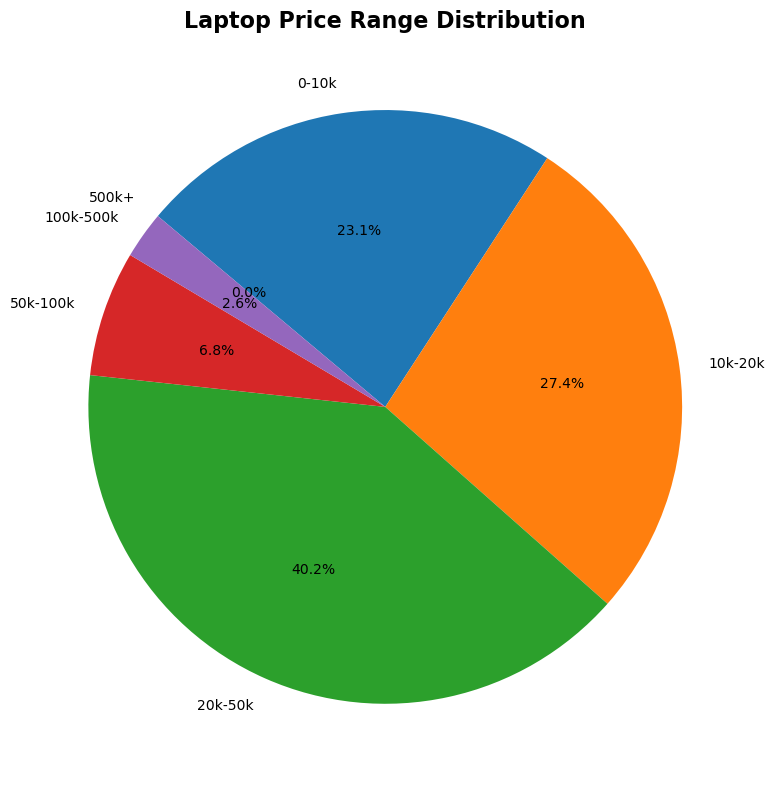

In [9]:
#Laptop Price Range Distribution

bins = [0, 10000, 20000, 50000, 100000, 500000, 1e8]
labels = ['0-10k', '10k-20k', '20k-50k', '50k-100k', '100k-500k', '500k+']

data['PriceRange'] = pd.cut(data['Price'], bins=bins, labels=labels, right=True)
price_counts = data['PriceRange'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(price_counts, labels=price_counts.index,
        autopct='%1.1f%%', startangle=140, counterclock=False)

plt.title('Laptop Price Range Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


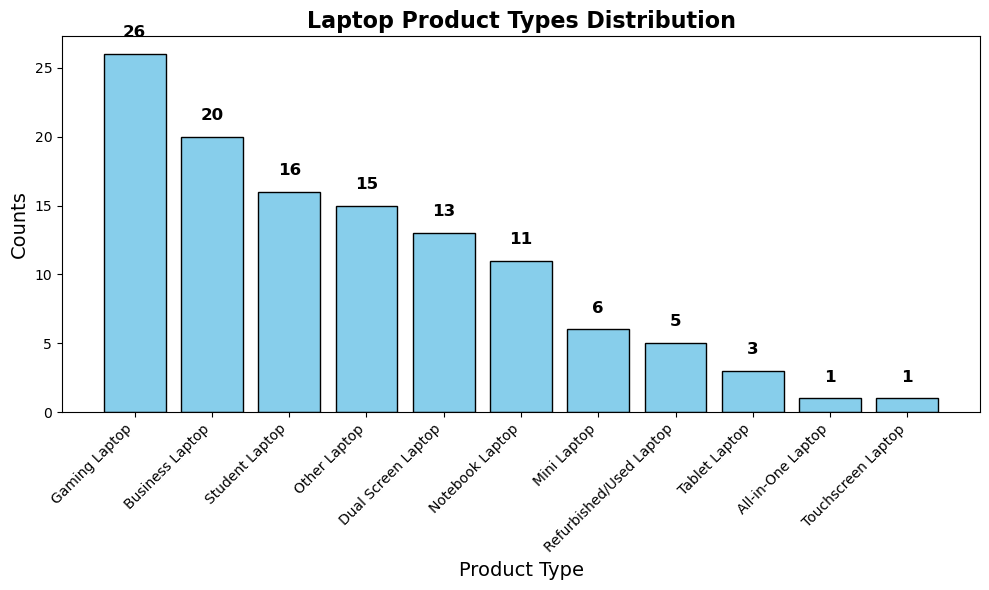

In [5]:
#Laptop Product Types Distribution

type_counts = data['Type'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(type_counts.index, type_counts.values, color='skyblue', edgecolor='black')

plt.title('Laptop Product Types Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Product Type', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval),
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

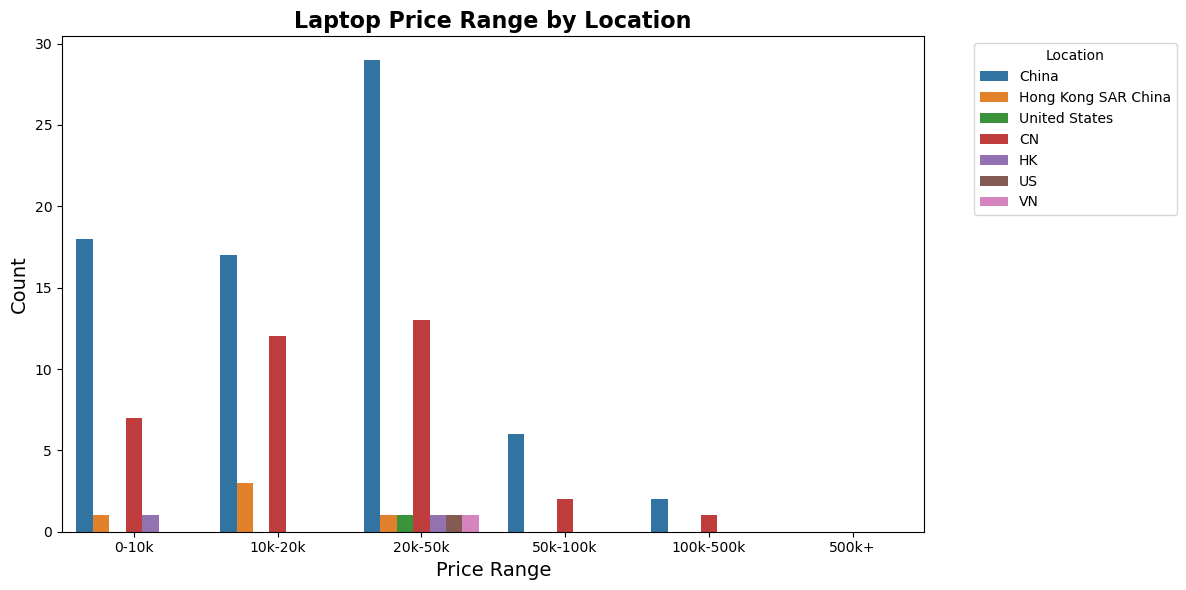

In [98]:
#Laptop Price Range by Location

data['PriceRange'] = pd.cut(data['Price'], bins=bins, labels=labels, right=True)
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='PriceRange', hue='Location', palette='tab10')
plt.title("Laptop Price Range by Location", fontsize=16, fontweight='bold')
plt.xlabel("Price Range", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



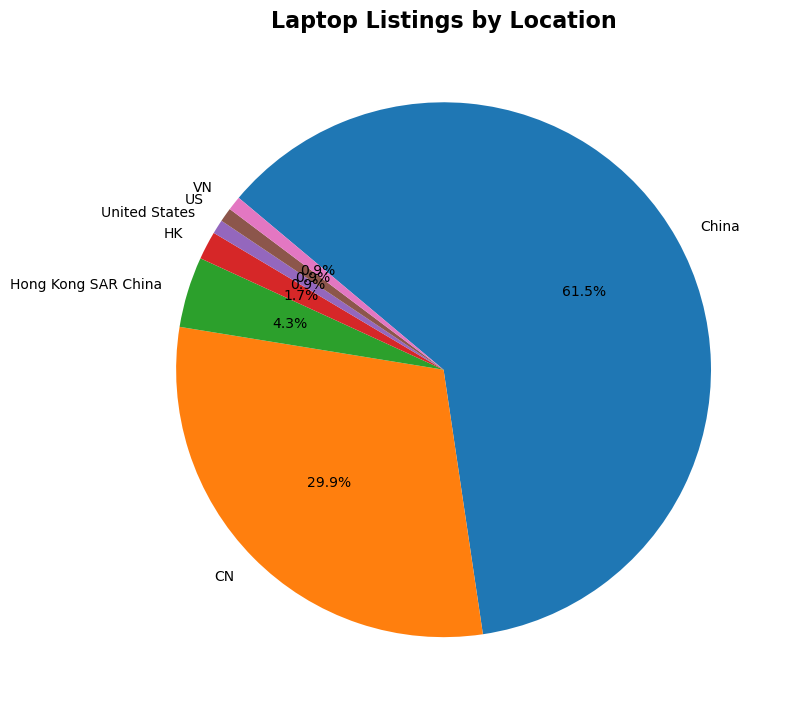

In [99]:
#Laptop Listings by Location

location_counts = data['Location'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140, counterclock=False)
plt.title("Laptop Listings by Location", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()